<a href="https://colab.research.google.com/github/jubeam/my_js_project/blob/master/Class_WNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
Found 70 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


W0902 20:58:57.832592 140486276388736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0902 20:58:57.885849 140486276388736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0902 20:58:57.897144 140486276388736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0902 20:58:57.959947 140486276388736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Found 2 images belonging to 2 classes.


W0902 20:58:58.004995 140486276388736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0902 20:58:58.028119 140486276388736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.

W0902 20:58:58.154499 140486276388736 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0902 20:58:58.214229 140486276388736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecate

Epoch 1/100
1500/1500 [==============================] - 208s 139ms/step - loss: 0.4857 - acc: 0.7440 - val_loss: 0.0685 - val_acc: 1.0000
Epoch 2/100
1500/1500 [==============================] - 189s 126ms/step - loss: 0.3248 - acc: 0.8707 - val_loss: 0.0422 - val_acc: 1.0000
Epoch 3/100
1500/1500 [==============================] - 191s 127ms/step - loss: 2.6857 - acc: 0.7573 - val_loss: 7.4391 - val_acc: 0.5385
Epoch 4/100
1500/1500 [==============================] - 190s 127ms/step - loss: 8.0268 - acc: 0.5020 - val_loss: 8.7917 - val_acc: 0.4545
Epoch 5/100
1500/1500 [==============================] - 191s 127ms/step - loss: 8.0340 - acc: 0.5016 - val_loss: 7.4391 - val_acc: 0.5385
Epoch 6/100
1500/1500 [==============================] - 190s 127ms/step - loss: 8.0304 - acc: 0.5018 - val_loss: 8.6790 - val_acc: 0.4615
Epoch 7/100
1500/1500 [==============================] - 189s 126ms/step - loss: 8.0304 - acc: 0.5018 - val_loss: 7.4391 - val_acc: 0.5385
Epoch 8/100
1500/1500 [====

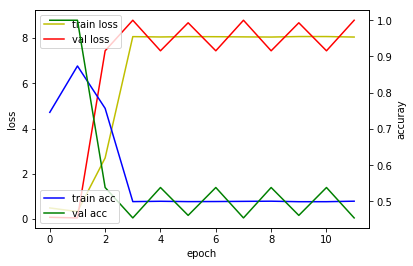

-- Evaluate --
acc: 53.85%
-- Predict --
{'cancer': 0, 'normal': 1}
[[1.000 0.000]
 [1.000 0.000]
 [1.000 0.000]
 [1.000 0.000]
 [1.000 0.000]
 [1.000 0.000]
 [1.000 0.000]
 [1.000 0.000]
 [1.000 0.000]
 [1.000 0.000]]


In [1]:
#0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# 랜덤시드 고정시키기
np.random.seed(3)

# 1. 데이터 생성하기

from google.colab import drive
drive.mount('/gdrive', force_remount=True)
train_datagen = ImageDataGenerator(
        rescale=1./255,         # 픽셀 값을 0~1 범위로 변환
        rotation_range=15,      # 15도까지 회전
        width_shift_range=0.1,  # 10%까지 좌우 이동
        height_shift_range=0.1, # 10%까지 상하 이동
        shear_range=0.5,        # 50%까지 기울임
        zoom_range=[0.8,2.0],         # 20%까지 확대
        horizontal_flip=True,   # 좌우 뒤집기
        vertical_flip=True,
       fill_mode='nearest')
    

train_generator = train_datagen.flow_from_directory(
        '/gdrive/My Drive/Colab Notebooks/WNR/train',
        target_size=(70, 70),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/gdrive/My Drive/Colab Notebooks/WNR/test',
        target_size=(70, 70),    
        batch_size=3,
       class_mode='categorical')
real_test_datagen = ImageDataGenerator(rescale=1./255)
real_test_generator = real_test_datagen.flow_from_directory(
        '/gdrive/My Drive/Colab Notebooks/WNR/real_test',
        target_size=(70, 70),    
        batch_size=3,
       class_mode='categorical')

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=(70,70,3)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 10) # 조기종료 콜백함수 정의
#hist = model.fit(X_train, Y_train, epochs=3000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[early_stopping])
hist= model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 100,
        epochs=100,
        validation_data=test_generator,
        validation_steps=5,
        callbacks=[early_stopping]    
        )
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
# 6. 모델 평가하기
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 7. 모델 사용하기
print("-- Predict --")
output = model.predict_generator(real_test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(real_test_generator.class_indices)
print(output)